In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [25]:
#df = pd.read_csv("auto-mpg.csv")
#df['horsepower'].replace('?', np.nan, inplace=True)
#df.dropna(subset=['horsepower'], inplace=True)
#df['horsepower'] = df['horsepower'].astype(float)

In [29]:
#df = sns.load_dataset('mpg')
#df.dropna(subset=['horsepower'], inplace=True)

In [43]:
X = df[['horsepower']]
y = df['mpg']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)

model = LinearRegression()
model.fit(X_poly_train, y_train)

LinearRegression()

In [47]:
X_poly_test = poly.transform(X_test)
y_pred = model.predict(X_poly_test)

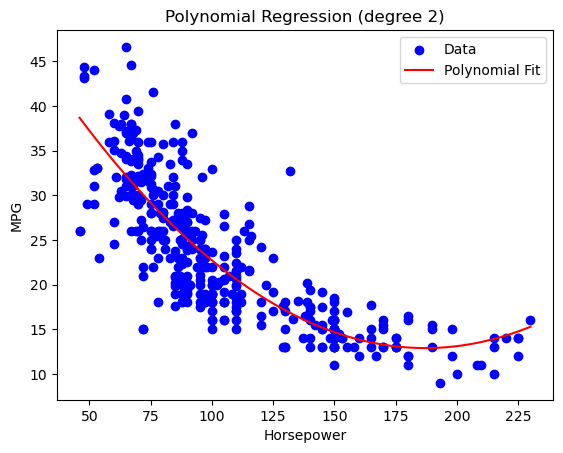

In [49]:
plt.scatter(X, y, color='blue', label='Data')
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)
plt.plot(X_range, y_range_pred, color='red', label='Polynomial Fit')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Polynomial Regression (degree 2)')
plt.legend()
plt.show()

In [51]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}')

MSE: 18.42, RMSE: 4.29, R²: 0.64
